## Considering data as data vs time and using prophet library to forecast which shown good results

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
!pip install prophet

import prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd

In [3]:
dates_2023 = pd.date_range(start='2023-01-01', end='2023-12-31')

In [4]:
import pandas as pd
from prophet import Prophet

# Read in the air quality data
data = pd.read_csv('/content/HW_data_Adilabad.csv')

# Convert the date column to a datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Rename the columns to ds and y for Prophet input
data = data.rename(columns={'Date': 'ds', 'Temp': 'y'})

# Create a Prophet model and fit the data
model = Prophet()
model.fit(data)

# Create a future dataframe for the date you want to forecast
future = pd.DataFrame({'ds': dates_2023})

# Use the model to make a forecast for the future date
forecast = model.predict(future)

# Print the forecasted air quality index for the future date
print(forecast['yhat'])

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf43j52jt/iqo0nmiy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpf43j52jt/0uq6q8c6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.8/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16628', 'data', 'file=/tmp/tmpf43j52jt/iqo0nmiy.json', 'init=/tmp/tmpf43j52jt/0uq6q8c6.json', 'output', 'file=/tmp/tmpf43j52jt/prophet_modelxo__sw5k/prophet_model-20230304174759.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:47:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:47:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0      32.410592
1      32.141826
2      32.390122
3      32.408731
4      32.436578
         ...    
360    33.811763
361    33.833907
362    33.607045
363    33.522144
364    33.691812
Name: yhat, Length: 365, dtype: float64


<AxesSubplot:>

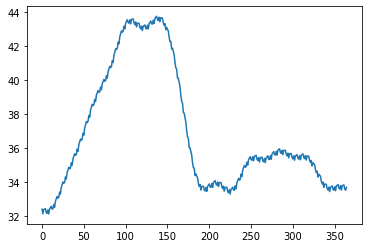

In [6]:
forecast['yhat'].plot()
# if temperature of above 40 degree occured on five consecutive days, we can say heatwave has occured.

In [7]:
dates_2022 = pd.date_range(start='2022-01-01', end='2022-12-31')

In [8]:
future2 = pd.DataFrame({'ds': dates_2023})

# Use the model to make a forecast for the future date
forecast2 = model.predict(future2)

In [9]:
data

,District,Mandal,ds,Rainfall (mm),temp_min,y,humidity_min (%),humidity_max (%),wind_speed_min (Kmph),wind_speed_max (Kmph)
0,Adilabad,Adilabad Urban,2020-01-01,14.0,16.4,26.6,67.8,87.6,0.0,8.2
1,Adilabad,Adilabad Urban,2020-01-02,2.2,17.1,26.8,72.7,98.7,0.0,3.7
2,Adilabad,Adilabad Urban,2020-01-03,27.8,16.9,22.9,86.3,100.0,0.0,7.5
3,Adilabad,Adilabad Urban,2020-01-04,0.0,16.3,21.3,85.5,100.0,0.0,4.2
4,Adilabad,Adilabad Urban,2020-01-05,0.0,14.6,24.7,77.6,100.0,0.0,1.6
...,...,...,...,...,...,...,...,...,...,...
1049,Adilabad,Adilabad Urban,2022-12-27,0.0,19.1,32.5,43.4,99.9,0.0,6.3
1050,Adilabad,Adilabad Urban,2022-12-28,0.0,19.5,34.6,49.7,99.9,0.0,6.5
1051,Adilabad,Adilabad Urban,2022-12-29,0.0,18.4,34.6,44.9,99.9,0.0,0.3
1052,Adilabad,Adilabad Urban,2022-12-30,0.0,16.1,32.4,41.3,99.9,0.0,2.0


In [10]:
data.dtypes

District                         object
Mandal                           object
ds                       datetime64[ns]
Rainfall (mm)                   float64
temp_min                        float64
y                               float64
humidity_min (%)                float64
humidity_max (%)                float64
wind_speed_min (Kmph)           float64
wind_speed_max (Kmph)           float64
dtype: object